In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

importing data sets

In [4]:
df = pd.read_excel(r"C:\Users\KIIT\Desktop\verzeo\Data_train.xlsx")
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [5]:
df.shape

(6019, 12)

In [6]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


cleaning the data

In [7]:
df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

Removing units

engine

In [8]:
new_list_engine = []
for engine in df['Engine']:
    string=str(engine)
    rep=string.replace('CC','')
    new_list_engine.append(rep)
    
new_list_engine
    
df.insert(8, 'Engine (CC)', new_list_engine)
df.drop(['Engine'], axis=1, inplace=True)
    
    
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine (CC),Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968,140.8 bhp,5.0,17.74


power

In [9]:
new_list_power = []
for power in df['Power']:
    string=str(power)
    rep=string.replace('bhp','')
    new_list_power.append(rep)
    
new_list_power
    
df.insert(9, 'Power (bhp)', new_list_power)
df.drop('Power', axis=1, inplace=True)
    
    
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine (CC),Power (bhp),Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582,126.2,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199,88.7,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968,140.8,5.0,17.74


mileage

finding the number of units of mileage

In [10]:
df_mileage1 = pd.DataFrame(df['Mileage'].str.contains(pat='km/kg'))
df_mileage1['Mileage'].value_counts()

False    5951
True       66
Name: Mileage, dtype: int64

In [11]:
df_mileage2 = pd.DataFrame(df['Mileage'].str.contains(pat='kmpl'))
df_mileage2['Mileage'].value_counts()

True     5951
False      66
Name: Mileage, dtype: int64

found kmpl for 5951 observations and km/kg for 66 observations. Calling the common unit as Mileage/Unit and removing the previous units.

In [12]:
new_list_mileage = []

for mileage in df['Mileage']:
    string=str(mileage)
    
    if 'kmpl'in string:
        rep=string.replace('kmpl','')
        new_list_mileage.append(rep)
    
    else:
        rep=string.replace('km/kg','')
        new_list_mileage.append(rep)
                        

        
        
new_list_mileage
    
df.insert(7, 'Mileage/unit', new_list_mileage)
df.drop('Mileage', axis=1, inplace=True)
    
    
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage/unit,Engine (CC),Power (bhp),Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74


Now converting columns to numerical types

In [13]:
df[["Mileage/unit"]] = df[["Mileage/unit"]].astype("float")
df[["Engine (CC)"]] = df[["Engine (CC)"]].astype("float")

In [14]:
df["Power (bhp)"] = pd.to_numeric(df["Power (bhp)"], errors='coerce')

In [15]:
df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage/unit         float64
Engine (CC)          float64
Power (bhp)          float64
Seats                float64
Price                float64
dtype: object

In [16]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage/unit,Engine (CC),Power (bhp),Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


missing values

In [17]:
df.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage/unit           2
Engine (CC)           36
Power (bhp)          143
Seats                 42
Price                  0
dtype: int64

eliminating outliers

engine

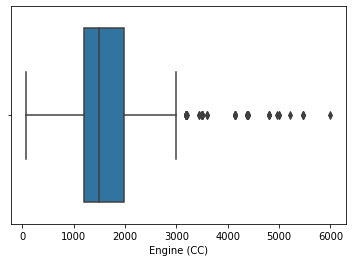

In [18]:
sns.boxplot(x='Engine (CC)', data=df)

In [19]:
df[df['Engine (CC)']>=3000]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage/unit,Engine (CC),Power (bhp),Seats,Price
70,Porsche Cayenne 2009-2014 Turbo,Mumbai,2008,73000,Petrol,Automatic,First,8.50,4806.0,500.0,5.0,14.50
152,Mercedes-Benz S Class 2005 2013 S 500,Kolkata,2010,35277,Petrol,Automatic,First,7.81,5461.0,362.9,5.0,30.00
459,Audi Q7 4.2 TDI Quattro Technology,Coimbatore,2016,51002,Diesel,Automatic,First,11.33,4134.0,335.2,7.0,48.91
586,Audi Q7 4.2 TDI Quattro Technology,Kochi,2014,79926,Diesel,Automatic,First,11.33,4134.0,335.2,7.0,29.77
589,Mercedes-Benz S Class 2005 2013 S 350 L,Bangalore,2006,47088,Petrol,Automatic,Second,10.13,3498.0,364.9,5.0,19.00
...,...,...,...,...,...,...,...,...,...,...,...,...
5728,Mercedes-Benz E-Class 2009-2013 E350 Petrol,Kolkata,2009,43600,Petrol,Automatic,First,10.93,3498.0,272.0,5.0,10.24
5781,Lamborghini Gallardo Coupe,Delhi,2011,6500,Petrol,Automatic,Third,6.40,5204.0,560.0,2.0,120.00
5885,Mercedes-Benz R-Class R350 4Matic Long,Pune,2010,93000,Petrol,Automatic,Second,11.80,3498.0,272.0,7.0,15.00
5919,Jaguar F Type 5.0 V8 S,Hyderabad,2015,8000,Petrol,Automatic,First,12.50,5000.0,488.1,2.0,100.00


power

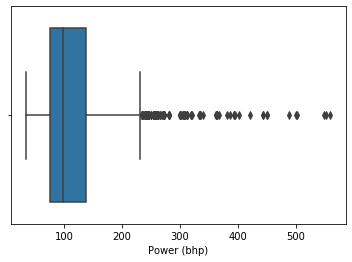

In [20]:
sns.boxplot(x='Power (bhp)', data=df)

In [21]:
df[df['Power (bhp)']>=230]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage/unit,Engine (CC),Power (bhp),Seats,Price
38,Mercedes-Benz M-Class ML 350 CDI,Pune,2013,85000,Diesel,Automatic,First,11.74,2987.0,254.80,5.0,28.00
70,Porsche Cayenne 2009-2014 Turbo,Mumbai,2008,73000,Petrol,Automatic,First,8.50,4806.0,500.00,5.0,14.50
103,Audi A4 3.0 TDI Quattro Premium,Kolkata,2010,30000,Diesel,Automatic,First,14.94,2967.0,241.40,5.0,9.80
107,Jaguar XF 3.0 Litre S Premium Luxury,Hyderabad,2011,78000,Diesel,Automatic,Second,14.74,2993.0,270.90,5.0,24.00
134,Mercedes-Benz SLC 43 AMG,Kolkata,2017,13372,Petrol,Automatic,First,19.00,2996.0,362.07,2.0,54.00
...,...,...,...,...,...,...,...,...,...,...,...,...
5919,Jaguar F Type 5.0 V8 S,Hyderabad,2015,8000,Petrol,Automatic,First,12.50,5000.0,488.10,2.0,100.00
5927,Audi Q5 3.0 TDI Quattro Technology,Coimbatore,2018,29091,Diesel,Automatic,First,13.22,2967.0,241.40,5.0,45.52
5946,BMW 5 Series 2013-2017 530d M Sport,Bangalore,2016,16000,Diesel,Automatic,First,14.69,2993.0,258.00,5.0,48.00
6008,Porsche Panamera Diesel,Hyderabad,2013,40000,Diesel,Automatic,Second,17.85,2967.0,300.00,4.0,45.00


mileage

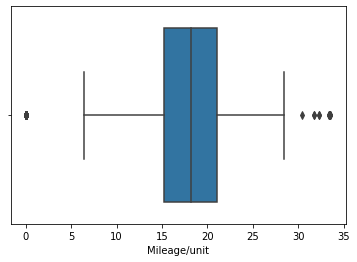

In [22]:
sns.boxplot(x='Mileage/unit', data=df)

here also removing the lower bound isolated outliers

In [23]:
df= df[df['Mileage/unit']>=5]

In [24]:
df[df['Mileage/unit']>=29]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage/unit,Engine (CC),Power (bhp),Seats,Price
1269,Maruti Alto 800 2016-2019 CNG LXI,Mumbai,2018,10600,CNG,Manual,First,33.44,796.0,40.30,4.0,3.50
1332,Maruti Wagon R CNG LXI,Pune,2013,79494,CNG,Manual,First,33.54,998.0,67.04,5.0,2.96
2059,Maruti Wagon R CNG LXI,Mumbai,2013,54000,CNG,Manual,First,33.54,998.0,67.04,5.0,3.05
2371,Maruti Wagon R CNG LXI,Pune,2014,29202,CNG,Manual,First,33.54,998.0,67.04,5.0,3.90
2701,Maruti Celerio CNG VXI MT,Kochi,2016,70536,CNG,Manual,First,31.79,998.0,58.33,5.0,4.58
3119,Maruti Alto K10 LXI CNG Optional,Kochi,2018,44202,CNG,Manual,First,32.26,998.0,58.20,4.0,4.00
3129,Maruti Wagon R CNG LXI,Delhi,2014,74663,CNG,Manual,First,33.54,998.0,67.04,5.0,3.25
3553,Maruti Alto 800 2016-2019 CNG LXI,Pune,2015,18000,CNG,Manual,First,33.44,796.0,40.30,4.0,3.00
3869,Maruti Alto 800 2016-2019 CNG LXI,Delhi,2012,65537,CNG,Manual,Second,33.44,796.0,40.30,4.0,2.10
4141,Maruti Wagon R CNG LXI,Mumbai,2014,47200,CNG,Manual,First,33.54,998.0,67.04,5.0,2.85


seats

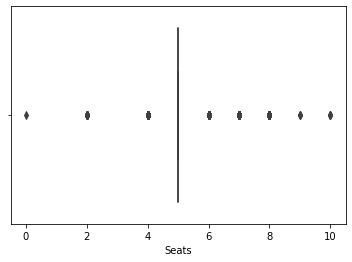

In [25]:
sns.boxplot(x='Seats',data=df)

In [26]:
df[df['Seats']>8]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage/unit,Engine (CC),Power (bhp),Seats,Price
814,Toyota Qualis FS B2,Pune,2004,77757,Diesel,Manual,Second,13.10,2446.0,75.0,10.0,3.50
917,Tata Sumo DX,Mumbai,2013,20000,Diesel,Manual,First,14.07,1978.0,83.1,10.0,5.25
1347,Mahindra Scorpio LX BS IV,Bangalore,2007,74112,Diesel,Manual,First,12.05,2179.0,120.0,9.0,4.10
1907,Toyota Qualis FS B3,Bangalore,2002,63000,Diesel,Manual,Third,13.10,2446.0,75.0,10.0,3.65
2312,Chevrolet Tavera LT 9 Str BS IV,Kolkata,2012,67132,Diesel,Manual,First,13.58,2499.0,78.0,9.0,4.75
2359,Mahindra Xylo D2 Maxx,Chennai,2016,150000,Diesel,Manual,First,14.95,2489.0,93.7,9.0,4.50
2575,Chevrolet Tavera LS B3 10 Seats BSIII,Hyderabad,2015,120000,Diesel,Manual,First,14.80,2499.0,80.0,10.0,5.50


price

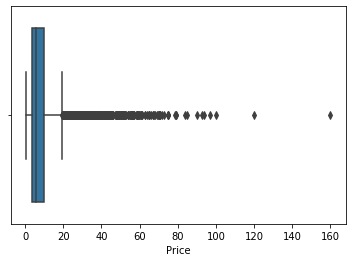

In [27]:
sns.boxplot(x='Price', data=df)

In [28]:
df[df['Price']>80]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage/unit,Engine (CC),Power (bhp),Seats,Price
1505,Land Rover Range Rover Sport SE,Kochi,2019,26013,Diesel,Automatic,First,12.65,2993.0,255.00,5.0,97.07
1974,BMW 7 Series 740Li,Coimbatore,2018,28060,Petrol,Automatic,First,12.05,2979.0,320.00,5.0,93.67
1984,BMW 7 Series 740Li,Bangalore,2017,17465,Petrol,Automatic,First,12.05,2979.0,320.00,5.0,93.00
2095,Mercedes-Benz SLC 43 AMG,Coimbatore,2019,2526,Petrol,Automatic,First,19.00,2996.0,362.07,2.0,83.96
4079,Land Rover Range Rover 3.0 Diesel LWB Vogue,Hyderabad,2017,25000,Diesel,Automatic,First,13.33,2993.0,255.00,5.0,160.00
4691,Mercedes-Benz SLK-Class 55 AMG,Bangalore,2014,3000,Petrol,Automatic,Second,12.00,5461.0,421.00,2.0,90.00
5535,BMW X6 xDrive 40d M Sport,Ahmedabad,2015,97003,Diesel,Automatic,First,15.87,2993.0,308.43,5.0,85.00
5781,Lamborghini Gallardo Coupe,Delhi,2011,6500,Petrol,Automatic,Third,6.40,5204.0,560.00,2.0,120.00
5919,Jaguar F Type 5.0 V8 S,Hyderabad,2015,8000,Petrol,Automatic,First,12.50,5000.0,488.10,2.0,100.00


Since the distribution of car data is not a normal distribution, therefore these above outliers are not the true outliers.There is huge disparity in the price, engine,and power of cars depending on their making. Now after using domain knowledge about cars and researching about the prices and other variables of these outliers data points, the marked values as outliers in boxplot are actually correct.

To find the true outliers, removing the disparity by creating new categorical variables as Engine_Class and Power_Segment. These categorical variables will take into account the segment of the car. We also find that some variables are function of others. First we will try to find the outliers in 'Mileage/unit' by grouping it based on 'Fuel_Type' as mileage is a function of the type of fuel.

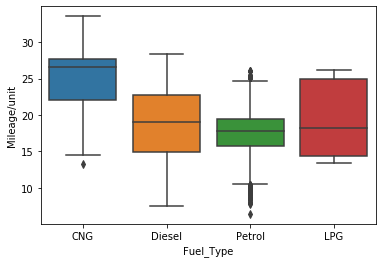

In [29]:
sns.boxplot(x='Fuel_Type', y='Mileage/unit',data=df)

Inspecting the values which appear to be outliers.

In [30]:
check1 = df.loc[df['Fuel_Type']=='CNG']
check1 = check1[check1['Mileage/unit']<=15]
check1

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage/unit,Engine (CC),Power (bhp),Seats,Price
893,Hyundai Accent Executive CNG,Hyderabad,2010,95637,CNG,Manual,Second,13.20,1495.0,93.7,5.0,1.90
3901,Toyota Corolla Altis 1.8 G CNG,Mumbai,2010,63000,CNG,Manual,Second,14.53,1798.0,138.0,5.0,3.35


In [31]:
check2 = df.loc[df['Fuel_Type']=='Petrol']
check2 = check2[check2['Mileage/unit']<=7]
check2

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage/unit,Engine (CC),Power (bhp),Seats,Price
5781,Lamborghini Gallardo Coupe,Delhi,2011,6500,Petrol,Automatic,Third,6.4,5204.0,560.0,2.0,120.0


These values are also correct, therefore they are not outliers

Now as mentioned earlier, we will create categorical variables

creating categorical variables-

In [32]:
bins_bhp = np.linspace(df['Power (bhp)'].min(), df['Power (bhp)'].max(), 5)
df['Power_Segment'] = pd.cut(df['Power (bhp)'], bins=bins_bhp, labels=['Low', 'Medium', 'High', 'Very High'], include_lowest=True)
df

C:\Users\KIIT\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage/unit,Engine (CC),Power (bhp),Seats,Price,Power_Segment
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Low
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Low
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Low
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Low
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75,Low
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00,Low
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90,Low
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65,Low


In [33]:
bins_cc = np.linspace(df['Engine (CC)'].min(), df['Engine (CC)'].max(), 5)
df['Engine_Class'] = pd.cut(df['Engine (CC)'], bins=bins_cc, labels=['Small', 'Medium', 'Large', 'Mega'], include_lowest=True)
df

C:\Users\KIIT\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage/unit,Engine (CC),Power (bhp),Seats,Price,Power_Segment,Engine_Class
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Low,Small
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Low,Small
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Low,Small
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Low,Small
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Low,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75,Low,Small
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00,Low,Small
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90,Low,Medium
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65,Low,Small


Finding out outliers in Power(bhp) based on Engine_Class, as we know that the power of a car depends on the engine size.

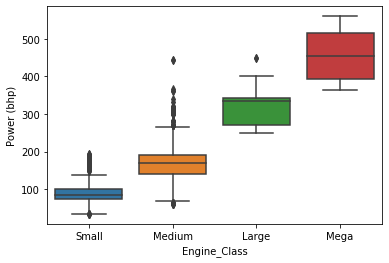

In [34]:
sns.boxplot(x='Engine_Class', y='Power (bhp)', data=df)

Again, inspecting the values which appear to be outliers.

In [35]:
check3 = df.loc[df['Engine_Class']=='Medium']
check3 = check3[check3['Power (bhp)']>=400]
check3

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage/unit,Engine (CC),Power (bhp),Seats,Price,Power_Segment,Engine_Class
148,Audi RS5 Coupe,Mumbai,2013,23000,Petrol,Automatic,First,11.05,2894.0,444.0,4.0,37.0,Very High,Medium
4061,Audi RS5 Coupe,Mumbai,2013,23312,Petrol,Automatic,First,11.05,2894.0,444.0,4.0,40.5,Very High,Medium


In [36]:
check4 = df.loc[df['Engine_Class']=='Large']
check4 = check4[check4['Power (bhp)']>=400]
check4

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage/unit,Engine (CC),Power (bhp),Seats,Price,Power_Segment,Engine_Class
3341,BMW 7 Series 2007-2012 750Li,Kochi,2010,50161,Petrol,Automatic,First,8.77,4395.0,402.0,5.0,25.93,High,Large
4627,BMW 6 Series 650i Coupe,Kochi,2010,65329,Petrol,Automatic,First,7.94,4395.0,450.0,4.0,20.72,Very High,Large
4821,BMW 6 Series 630i Coupe,Mumbai,2011,5900,Petrol,Automatic,First,7.94,4395.0,450.0,4.0,47.50,Very High,Large


These values are also correct and not outliers. Now price of the car is the function of its enginr size and power so finding the outliers in price based on Engine_Class and Power_Segment.

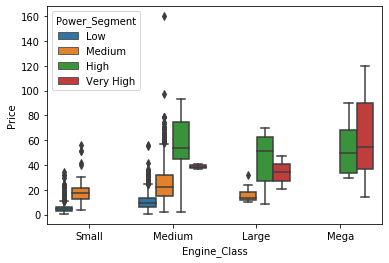

In [37]:
sns.boxplot(x='Engine_Class', y='Price', hue='Power_Segment', data=df)

Again, inspecting the values which appear to be outliers.

In [38]:
check5 = df.loc[df['Engine_Class']=='Small']
check5 = check5[check5['Power_Segment']=='Medium']
check5 = check5[check5['Price']>=40]
check5

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage/unit,Engine (CC),Power (bhp),Seats,Price,Power_Segment,Engine_Class
473,Mercedes-Benz E-Class E 220 d,Kochi,2018,26405,Petrol,Automatic,First,12.60,1950.0,191.34,5.0,51.43,Medium,Small
1113,Mercedes-Benz E-Class E 220 d,Kochi,2018,20446,Petrol,Automatic,First,12.60,1950.0,191.34,5.0,51.35,Medium,Small
2509,Mercedes-Benz E-Class E 220 d,Mumbai,2018,11000,Diesel,Automatic,First,16.10,1950.0,194.00,5.0,56.50,Medium,Small
3836,Audi A6 35 TFSI Matrix,Delhi,2018,22000,Petrol,Automatic,First,15.26,1798.0,187.74,5.0,41.50,Medium,Small


In [39]:
check6 = df.loc[df['Engine_Class']=='Medium']
check6 = check6[check6['Power_Segment']=='Medium']
check6 = check6[check6['Price']>=140]
check6

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage/unit,Engine (CC),Power (bhp),Seats,Price,Power_Segment,Engine_Class
4079,Land Rover Range Rover 3.0 Diesel LWB Vogue,Hyderabad,2017,25000,Diesel,Automatic,First,13.33,2993.0,255.0,5.0,160.0,Medium,Medium


These values are also accurate

Hence our initial prognosis of outliers not being true outliers and in turn being accurate data, turns out to be correct

Now we will replace the missing values

Replacing missing values

In [40]:
df.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage/unit           0
Engine (CC)           25
Power (bhp)          104
Seats                 30
Price                  0
Power_Segment        104
Engine_Class          25
dtype: int64

Since the data has a lot of outliers as seen in boxplot, so replacing the missing values with medians.

In [41]:
df['Engine (CC)'].replace(np.nan, df['Engine (CC)'].median(), inplace=True)
df['Power (bhp)'].replace(np.nan, df['Power (bhp)'].median(), inplace=True)
df['Seats'].replace(np.nan, df['Seats'].median(), inplace=True)

C:\Users\KIIT\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [42]:
df['Mileage/unit'].replace(0, df['Mileage/unit'].median(), inplace=True)

In [43]:
df.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage/unit           0
Engine (CC)            0
Power (bhp)            0
Seats                  0
Price                  0
Power_Segment        104
Engine_Class          25
dtype: int64

checking for any left missing values.

Since we created two new variables, we will replace the missing values in 'Engine_Class' and 'Power_Segment' based on the range they fall in

In [44]:
bins_cc = np.linspace(df['Engine (CC)'].min(), df['Engine (CC)'].max(), 5)
df['Engine_Class'] = pd.cut(df['Engine (CC)'], bins=bins_cc, labels=['Small', 'Medium', 'Large', 'Mega'], include_lowest=True)
df[df['Engine_Class'].isnull()]

C:\Users\KIIT\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage/unit,Engine (CC),Power (bhp),Seats,Price,Power_Segment,Engine_Class


In [45]:
bins_bhp = np.linspace(df['Power (bhp)'].min(), df['Power (bhp)'].max(), 5)
df['Power_Segment'] = pd.cut(df['Power (bhp)'], bins=bins_bhp, labels=['Low', 'Medium', 'High', 'Very High'], include_lowest=True)
df[df['Power_Segment'].isnull()]

C:\Users\KIIT\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage/unit,Engine (CC),Power (bhp),Seats,Price,Power_Segment,Engine_Class


In [46]:
df.insert(9,'Engine_Class',df['Engine_Class'],allow_duplicates=True)

In [47]:
df.insert(11,'Power_Segment',df['Power_Segment'],allow_duplicates=True)

In [48]:
df = df.iloc[:,0:14]
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage/unit,Engine (CC),Engine_Class,Power (bhp),Power_Segment,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,Small,58.16,Low,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,Small,126.20,Low,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,Small,88.70,Low,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,Small,88.76,Low,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,Medium,140.80,Low,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,Small,74.00,Low,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,Small,71.00,Low,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,Medium,112.00,Low,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,Small,67.10,Low,5.0,2.65


In [49]:
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage/unit         0
Engine (CC)          0
Engine_Class         0
Power (bhp)          0
Power_Segment        0
Seats                0
Price                0
dtype: int64

Now the data is completely clean as we can see there are no missing values and outliers have been dealt with.

Exploratory Data Analysis

In [50]:
df.to_csv('clean_data.csv', index=False)

In [51]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage/unit,Engine (CC),Engine_Class,Power (bhp),Power_Segment,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,Small,58.16,Low,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,Small,126.20,Low,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,Small,88.70,Low,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,Small,88.76,Low,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,Medium,140.80,Low,5.0,17.74


Now we know that the price of car depends on how the car is old. So creating a column which tells the age of car.

In [52]:
df.insert(3, 'Years_Old', 2020 - df['Year'])
df.head()

,Name,Location,Year,Years_Old,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage/unit,Engine (CC),Engine_Class,Power (bhp),Power_Segment,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,10,72000,CNG,Manual,First,26.60,998.0,Small,58.16,Low,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,5,41000,Diesel,Manual,First,19.67,1582.0,Small,126.20,Low,5.0,12.50
2,Honda Jazz V,Chennai,2011,9,46000,Petrol,Manual,First,18.20,1199.0,Small,88.70,Low,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,8,87000,Diesel,Manual,First,20.77,1248.0,Small,88.76,Low,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,7,40670,Diesel,Automatic,Second,15.20,1968.0,Medium,140.80,Low,5.0,17.74


In [53]:
df.corr()

,Year,Years_Old,Kilometers_Driven,Mileage/unit,Engine (CC),Power (bhp),Seats,Price
Year,1.000000,-1.000000,-0.170561,0.296718,-0.057960,0.020093,0.015860,0.302463
Years_Old,-1.000000,1.000000,0.170561,-0.296718,0.057960,-0.020093,-0.015860,-0.302463
Kilometers_Driven,-0.170561,0.170561,1.000000,-0.064283,0.092431,0.033366,0.081407,-0.009048
Mileage/unit,0.296718,-0.296718,-0.064283,1.000000,-0.645478,-0.548240,-0.343516,-0.333263
Engine (CC),-0.057960,0.057960,0.092431,-0.645478,1.000000,0.862351,0.396405,0.658130
Power (bhp),0.020093,-0.020093,0.033366,-0.548240,0.862351,1.000000,0.104426,0.773250
Seats,0.015860,-0.015860,0.081407,-0.343516,0.396405,0.104426,1.000000,0.055178
Price,0.302463,-0.302463,-0.009048,-0.333263,0.658130,0.773250,0.055178,1.000000


In [54]:
df.corr()['Price']

Year                 0.302463
Years_Old           -0.302463
Kilometers_Driven   -0.009048
Mileage/unit        -0.333263
Engine (CC)          0.658130
Power (bhp)          0.773250
Seats                0.055178
Price                1.000000
Name: Price, dtype: float64

We here note that:

older the car, lower is the price
more the kilometers driven, less the price, although the correlation is not that strong
more the Engine capacity and Power of the car, higher is the price
Mileage is inversely proportional to the price of cars. This maybe due to the fact that luxury cars have lesser mileage and greater cost
We have mentioned earlier that there is a huge disparity in the prices of the cars. This is down to the make of the car. Luxury car makers like Audi, Porsche, Range Rover etc. have very expensive cars compared to economy section like Maruti or Tata

We will now try to create a categorical variable which is based on the make of the car

In [55]:
make = []
for name in df['Name']:
    make.append(name.split(' ')[0])

df.insert(1, 'Make', make)
df.head()

,Name,Make,Location,Year,Years_Old,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage/unit,Engine (CC),Engine_Class,Power (bhp),Power_Segment,Seats,Price
0,Maruti Wagon R LXI CNG,Maruti,Mumbai,2010,10,72000,CNG,Manual,First,26.60,998.0,Small,58.16,Low,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Pune,2015,5,41000,Diesel,Manual,First,19.67,1582.0,Small,126.20,Low,5.0,12.50
2,Honda Jazz V,Honda,Chennai,2011,9,46000,Petrol,Manual,First,18.20,1199.0,Small,88.70,Low,5.0,4.50
3,Maruti Ertiga VDI,Maruti,Chennai,2012,8,87000,Diesel,Manual,First,20.77,1248.0,Small,88.76,Low,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Audi,Coimbatore,2013,7,40670,Diesel,Automatic,Second,15.20,1968.0,Medium,140.80,Low,5.0,17.74


In [56]:
df['Make'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley', 'Lamborghini'],
      dtype=object)

In [57]:
df['Make'].replace('Land','Land Rover',inplace=True)
df['Make'].replace('Isuzu', 'ISUZU',inplace=True)

In [58]:
df['Make'].nunique()

29

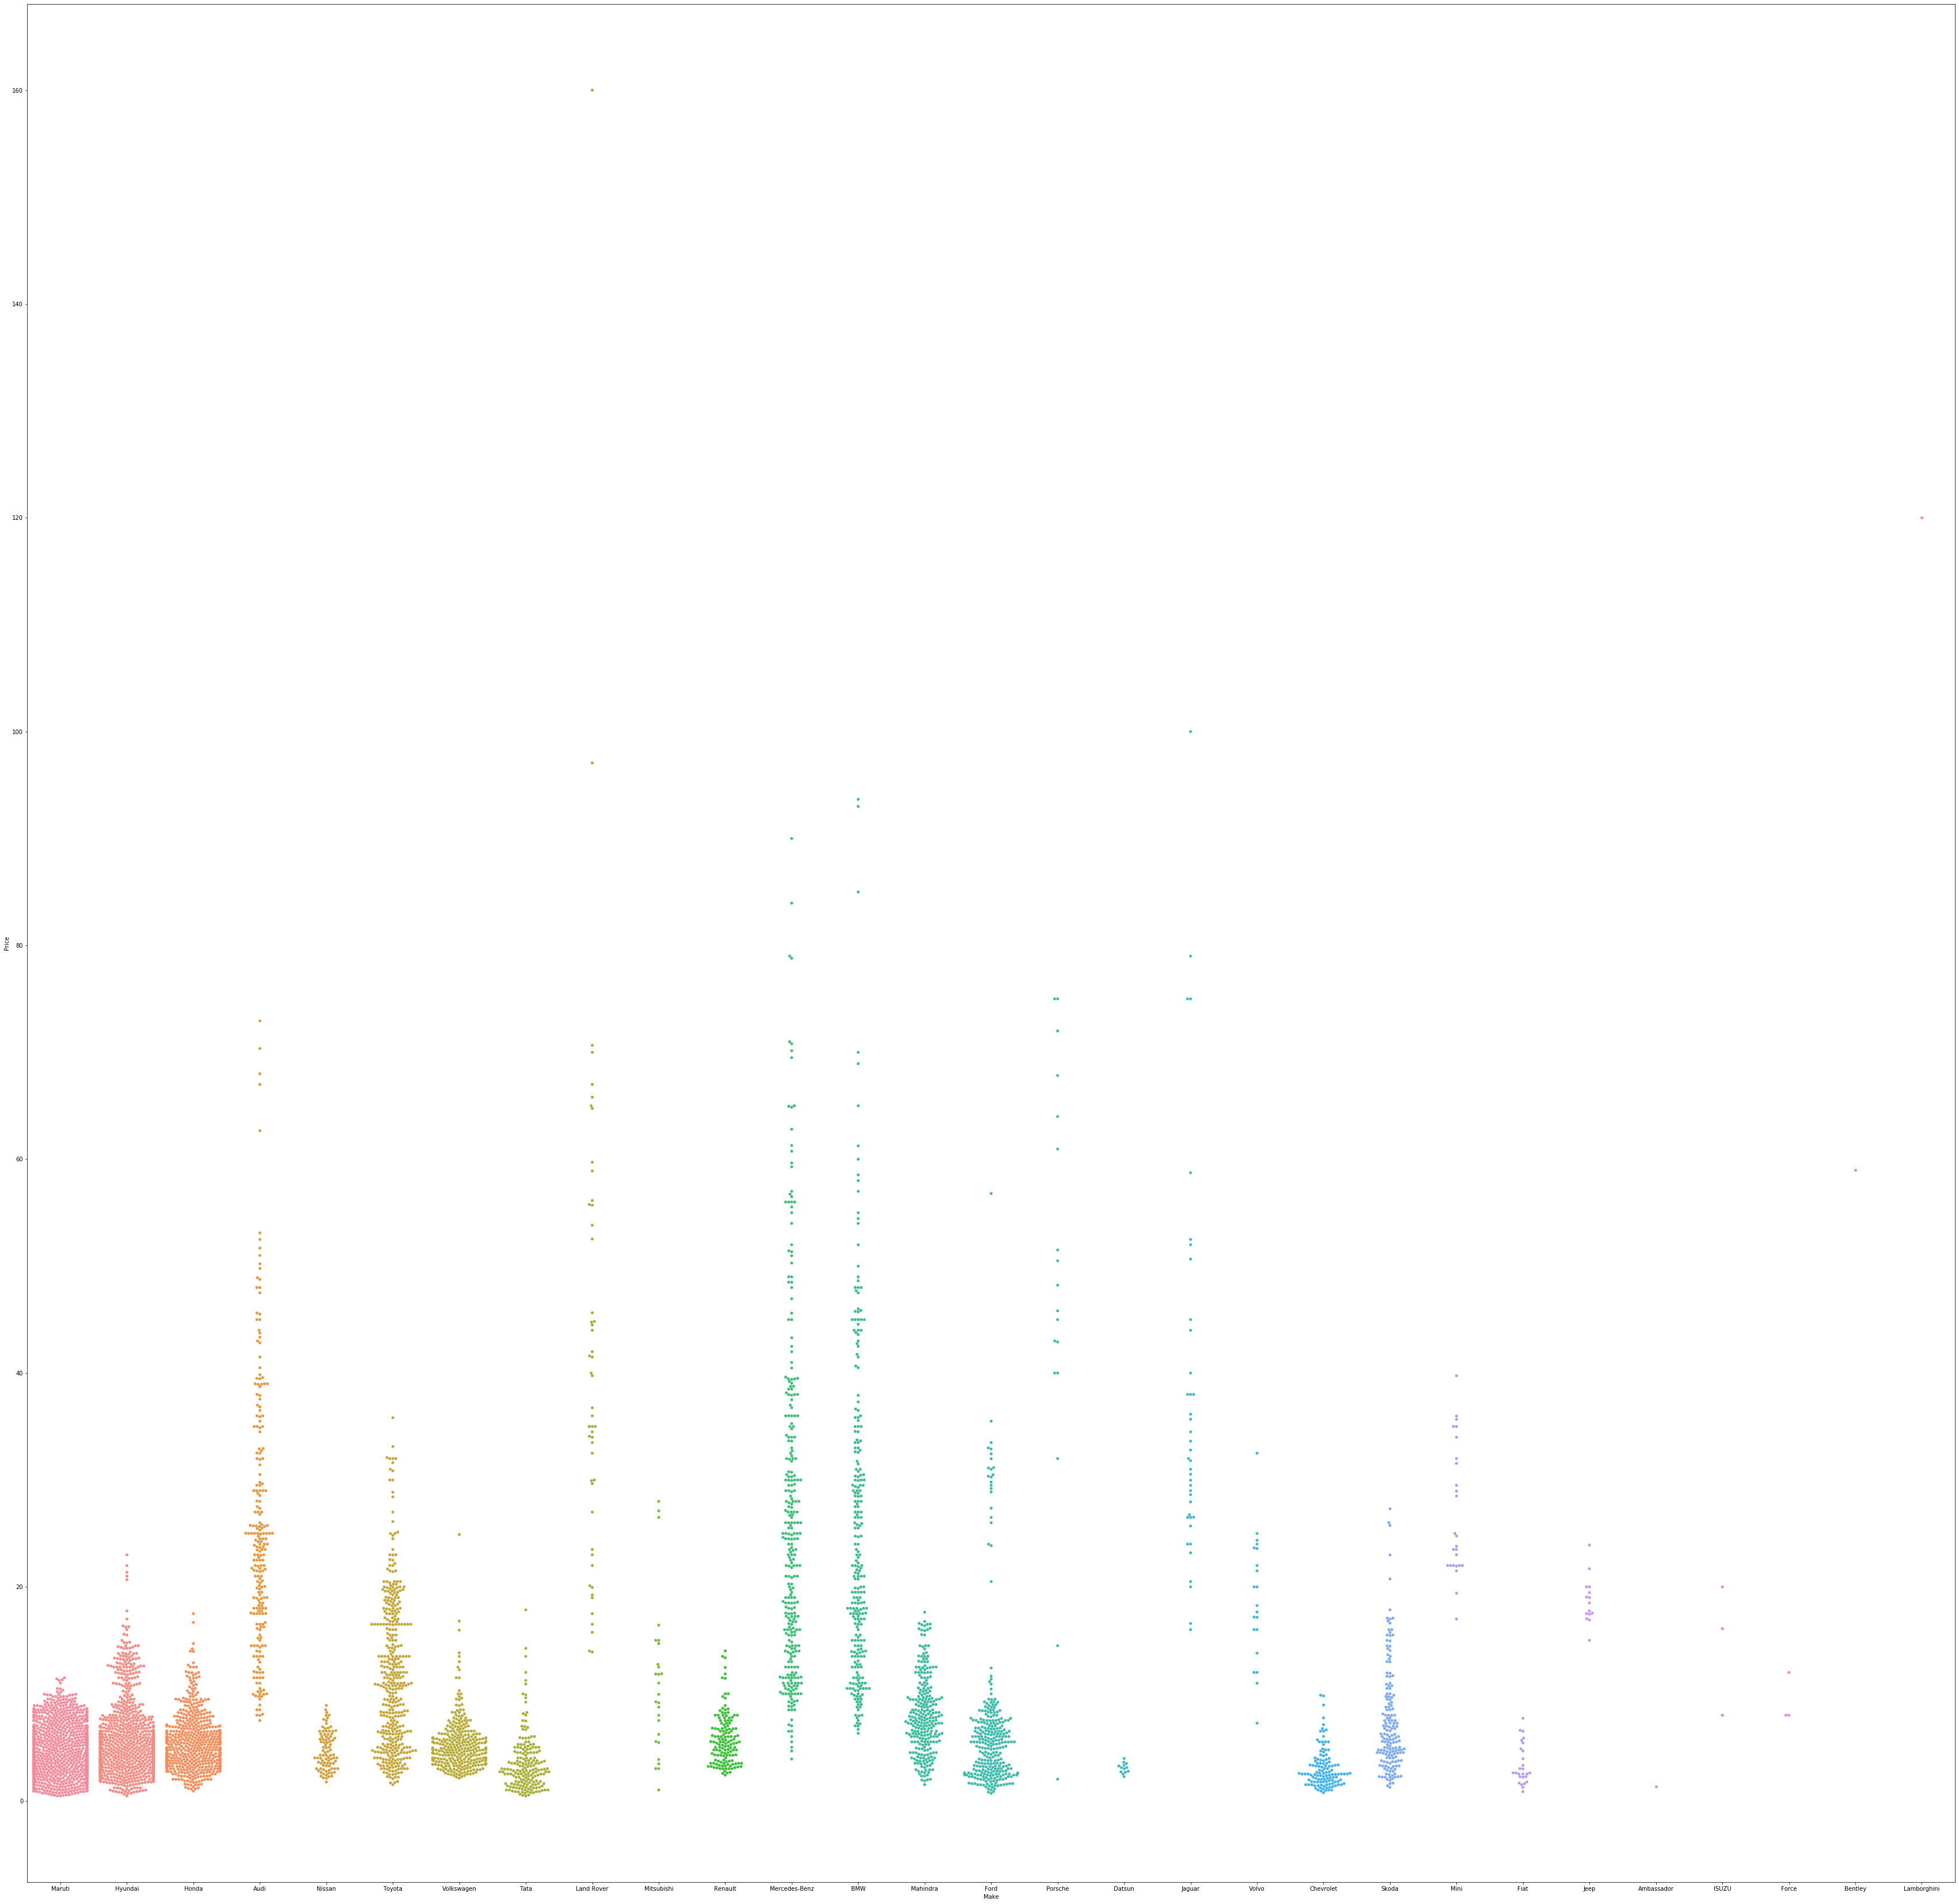

In [59]:
plt.figure(figsize=(60,60))
sns.swarmplot(x='Make', y='Price', data=df)

In [60]:
df_make = df[['Make', 'Price']]
df_make_plot = df_make.groupby('Make').mean()
df_make_plot

,Price
Make,
Ambassador,1.350000
Audi,25.527234
BMW,25.243146
Bentley,59.000000
Chevrolet,3.044463
Datsun,3.049231
Fiat,3.370000
Force,9.333333
Ford,6.900401


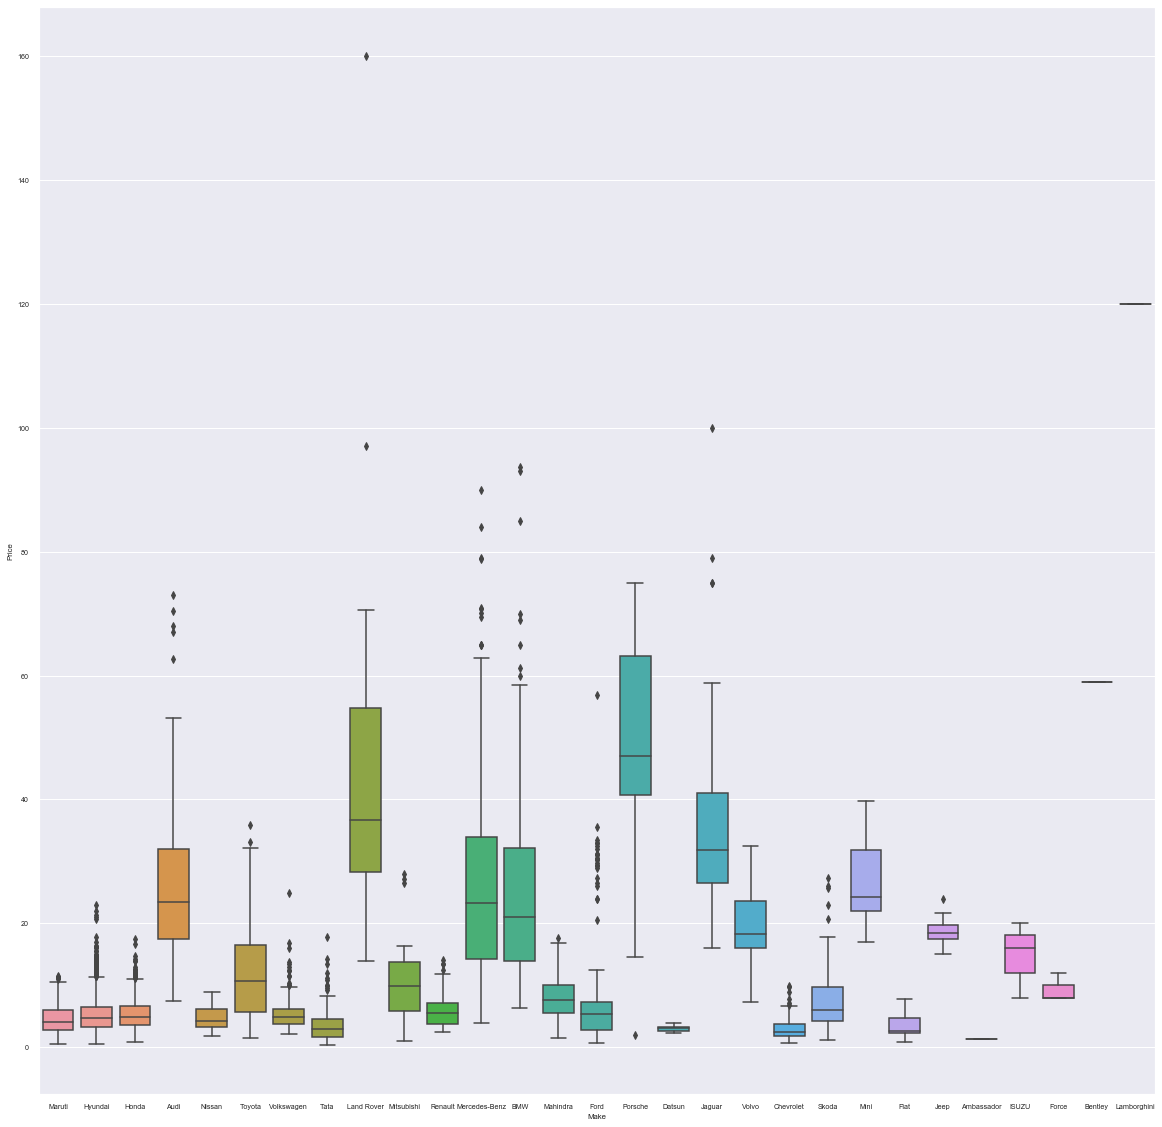

In [61]:
plt.figure(figsize=(20,20))
sns.set(font_scale=0.65)
sns.boxplot(x='Make', y='Price', data=df)

Since box plots give us the distribution of data in each category, we can clearly see that categorical divisions can be made on the 'Make' column. Makers like Maruti, Hyundai and Tata are the cheapest, while in the same dataset there is Lamborghini was costs in excess of 1.2Cr. Therefore category of maker makes a huge difference in the price. Thus, we will include the category of make as a variable.

Now,plotting the mean price for each type of make

Text(0.5, 1.0, 'Means of Prices for Different Makes')

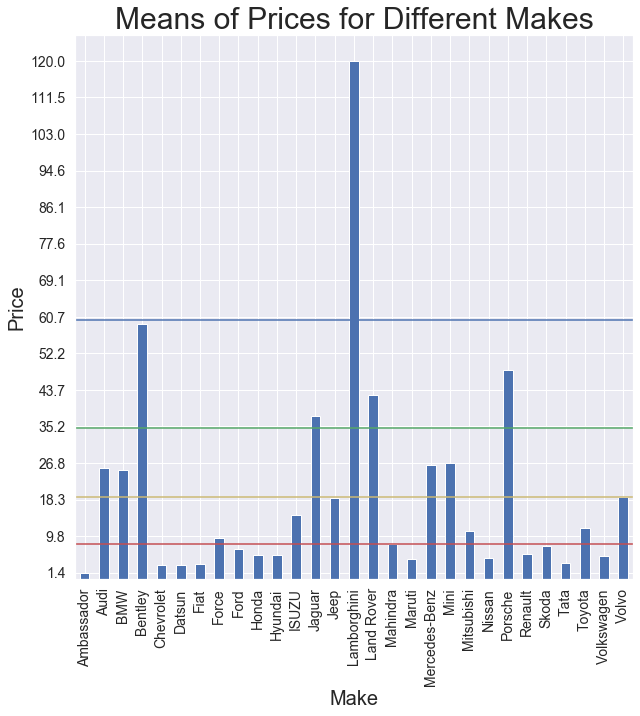

In [62]:
bins = np.linspace(df_make_plot['Price'].min(), df_make_plot['Price'].max(), 15)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,1,1)
df_make_plot.plot(kind='bar', fontsize=14, ax=ax1)
ax1.set_xlabel('Make', fontsize=20)
ax1.set_ylabel('Price', fontsize=20)
ax1.set_yticks(bins)
ax1.get_legend().remove()
ax1.axhline(y=8, color='r')
ax1.axhline(y=19, color='y')
ax1.axhline(y=35, color='g')
ax1.axhline(y=60, color='b')
ax1.set_title('Means of Prices for Different Makes', fontsize=30)

Based on the two plots above and the reputation of car brands, we can make categories for 'Make'. We will be making categories based on the divisions made in the bar chart above.

In [63]:
make_category = []

for make in df['Make']:
    
    if make in ['Ambassador', 'Chevrolet', 'Datsun', 'Fiat', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti', 'Nissan', 'Renault', 'Skoda', 'Tata', 'Volkswagen']:
        make_category.append('Economy')
    
    elif make in ['Force', 'ISUZU', 'Jeep', 'Mitsubishi', 'Toyota', 'Volvo']:
        make_category.append('Mid Segment')
        
    elif make in ['Audi', 'BMW', 'Mercedes-Benz', 'Mini']:
        make_category.append('Upper Segment')
        
    elif make in ['Bentley', 'Jaguar', 'Land Rover', 'Porsche']:
        make_category.append('Luxury')
        
    elif make=='Lamborghini':
        make_category.append('Super Car')

        
df.insert(2, 'Make_Category', make_category)
df.head()

,Name,Make,Make_Category,Location,Year,Years_Old,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage/unit,Engine (CC),Engine_Class,Power (bhp),Power_Segment,Seats,Price
0,Maruti Wagon R LXI CNG,Maruti,Economy,Mumbai,2010,10,72000,CNG,Manual,First,26.60,998.0,Small,58.16,Low,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Economy,Pune,2015,5,41000,Diesel,Manual,First,19.67,1582.0,Small,126.20,Low,5.0,12.50
2,Honda Jazz V,Honda,Economy,Chennai,2011,9,46000,Petrol,Manual,First,18.20,1199.0,Small,88.70,Low,5.0,4.50
3,Maruti Ertiga VDI,Maruti,Economy,Chennai,2012,8,87000,Diesel,Manual,First,20.77,1248.0,Small,88.76,Low,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Audi,Upper Segment,Coimbatore,2013,7,40670,Diesel,Automatic,Second,15.20,1968.0,Medium,140.80,Low,5.0,17.74


Encoding the 'Make_Category' and analysing its correlation with Price

In [64]:
df['Make_Category'].replace(to_replace=['Economy', 'Mid Segment', 'Upper Segment', 'Luxury', 'Super Car'], value=[1, 2, 3, 4, 5], inplace=True)
df.head()

,Name,Make,Make_Category,Location,Year,Years_Old,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage/unit,Engine (CC),Engine_Class,Power (bhp),Power_Segment,Seats,Price
0,Maruti Wagon R LXI CNG,Maruti,1,Mumbai,2010,10,72000,CNG,Manual,First,26.60,998.0,Small,58.16,Low,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,1,Pune,2015,5,41000,Diesel,Manual,First,19.67,1582.0,Small,126.20,Low,5.0,12.50
2,Honda Jazz V,Honda,1,Chennai,2011,9,46000,Petrol,Manual,First,18.20,1199.0,Small,88.70,Low,5.0,4.50
3,Maruti Ertiga VDI,Maruti,1,Chennai,2012,8,87000,Diesel,Manual,First,20.77,1248.0,Small,88.76,Low,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Audi,3,Coimbatore,2013,7,40670,Diesel,Automatic,Second,15.20,1968.0,Medium,140.80,Low,5.0,17.74


Converting it as a numerical variable to see the correlation with price

In [65]:
df[["Make_Category"]] = df[["Make_Category"]].astype('int')
df.head()

,Name,Make,Make_Category,Location,Year,Years_Old,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage/unit,Engine (CC),Engine_Class,Power (bhp),Power_Segment,Seats,Price
0,Maruti Wagon R LXI CNG,Maruti,1,Mumbai,2010,10,72000,CNG,Manual,First,26.60,998.0,Small,58.16,Low,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,1,Pune,2015,5,41000,Diesel,Manual,First,19.67,1582.0,Small,126.20,Low,5.0,12.50
2,Honda Jazz V,Honda,1,Chennai,2011,9,46000,Petrol,Manual,First,18.20,1199.0,Small,88.70,Low,5.0,4.50
3,Maruti Ertiga VDI,Maruti,1,Chennai,2012,8,87000,Diesel,Manual,First,20.77,1248.0,Small,88.76,Low,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Audi,3,Coimbatore,2013,7,40670,Diesel,Automatic,Second,15.20,1968.0,Medium,140.80,Low,5.0,17.74


In [66]:
df.corr()['Price']

Make_Category        0.750095
Year                 0.302463
Years_Old           -0.302463
Kilometers_Driven   -0.009048
Mileage/unit        -0.333263
Engine (CC)          0.658130
Power (bhp)          0.773250
Seats                0.055178
Price                1.000000
Name: Price, dtype: float64

Now analysing the correlation of all the variables with price

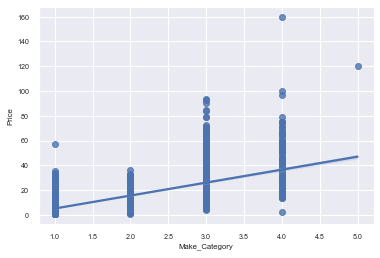

In [67]:
sns.regplot(x='Make_Category',y='Price',data=df)

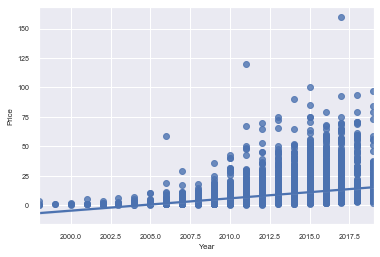

In [68]:
sns.regplot(x='Year',y='Price',data=df)

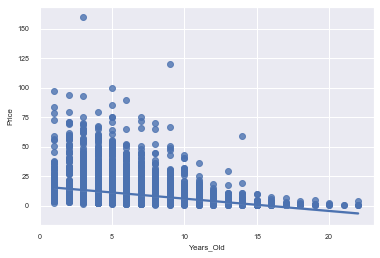

In [69]:
sns.regplot(x='Years_Old',y='Price',data=df)

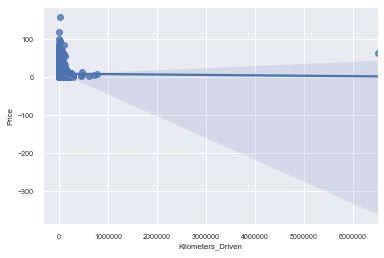

In [70]:
sns.regplot(x='Kilometers_Driven',y='Price',data=df)

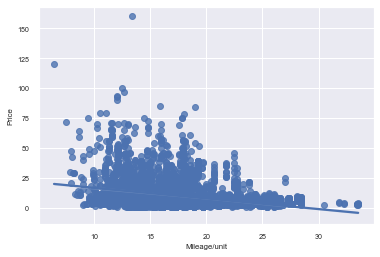

In [71]:
sns.regplot(x='Mileage/unit',y='Price',data=df)

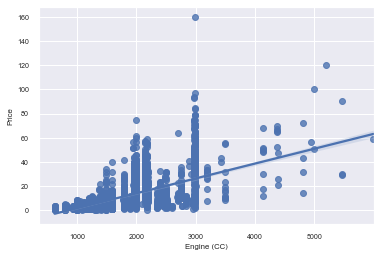

In [72]:
sns.regplot(x='Engine (CC)',y='Price',data=df)

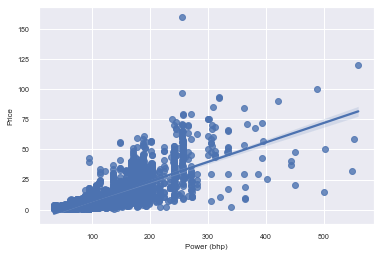

In [73]:
sns.regplot(x='Power (bhp)',y='Price',data=df)

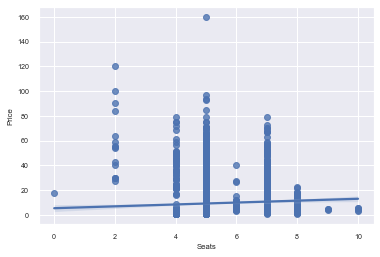

In [74]:
sns.regplot(x='Seats',y='Price',data=df)

Dropping 'Years_Old' column as we see that Year and Years_Old are redundant.

In [75]:
df.drop('Years_Old', axis=1, inplace=True)

Dropping 'Kilometers_Driven' and 'Seats' due to poor correlation with price.

Feature Selection

Based on these inferences, we will create a new data frame which will have the relevant predictor variables, which are:

Make_Category,
Year,
Mileage/unit,
Engine (CC),
Power (bhp),
Price

In [76]:
df_features = df[['Name', 'Make_Category', 'Year', 'Mileage/unit', 'Engine (CC)', 'Power (bhp)', 'Price']]
df_features

,Name,Make_Category,Year,Mileage/unit,Engine (CC),Power (bhp),Price
0,Maruti Wagon R LXI CNG,1,2010,26.60,998.0,58.16,1.75
1,Hyundai Creta 1.6 CRDi SX Option,1,2015,19.67,1582.0,126.20,12.50
2,Honda Jazz V,1,2011,18.20,1199.0,88.70,4.50
3,Maruti Ertiga VDI,1,2012,20.77,1248.0,88.76,6.00
4,Audi A4 New 2.0 TDI Multitronic,3,2013,15.20,1968.0,140.80,17.74
...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,1,2014,28.40,1248.0,74.00,4.75
6015,Hyundai Xcent 1.1 CRDi S,1,2015,24.40,1120.0,71.00,4.00
6016,Mahindra Xylo D4 BSIV,1,2012,14.00,2498.0,112.00,2.90
6017,Maruti Wagon R VXI,1,2013,18.90,998.0,67.10,2.65


Modelling

We will train the following models over our dataset and choose the best model based on the evaluation

Multiple Linear Regression

Random Forest Regression

Decision Tree Regression


Here for training we will perform a train test split and use the same training and testing data to evaluate the model. For evaluation we use two metrics:

RMSE

Cross Validation Score (finally expressed in percentage here)

Train Test Split

In [77]:
# defining the predictor and target variables
x = df[['Make_Category', 'Year', 'Mileage/unit', 'Engine (CC)', 'Power (bhp)']]
y = df[['Price']]

In [78]:
# splitting the data into training set and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)
print('Shape of data:\nx_train: {}\nx_test: {}\ny_train: {}\ny_test: {}'.format(x_train.shape, x_test.shape, y_train.shape, y_test.shape))

Shape of data:
x_train: (4164, 5)
x_test: (1785, 5)
y_train: (4164, 1)
y_test: (1785, 1)


Multiple Linear Regression

Training

Now here feature scaling and normalization is not required as we are going to use Multiple Regression, therefore the coefficients for these variables will be set accordingly.

We will now try to see if Multiple Linear Regression is a good model for the data

In [79]:
lr = LinearRegression()
lr.fit(x_train, y_train)
yhat = lr.predict(x_test)
yhat.shape

(1785, 1)

Evaluation

In [80]:
score_lr = cross_val_score(lr, x, y, cv=4)

In [81]:
print('Accuracy Score(%):{}'.format(100*score_lr.mean()))
print('RMSE:{}'.format(np.sqrt(mean_squared_error(yhat, y_test))))

Accuracy Score(%):74.3030692652188
RMSE:6.164078169275776


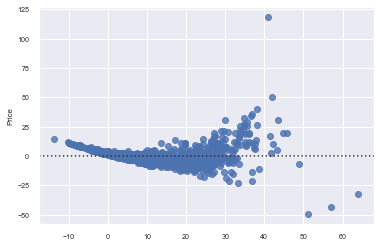

In [82]:
sns.residplot(yhat, y_test)

We can see that the residue plot for the Linear Regression model is showing a curvature. This implies that Linear Regression is not a good fit for this data. Therefore we will try another model

Random Forest Regression

Training

In [83]:
rfr = RandomForestRegressor(n_estimators=200)

In [84]:
rfr.fit(x_train,y_train)

C:\Users\KIIT\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [85]:
rfr_pred = rfr.predict(x_test)

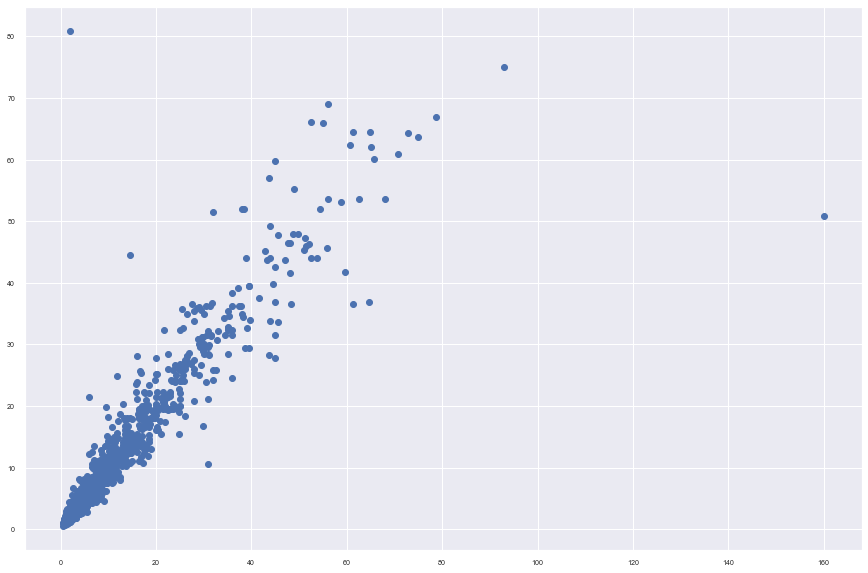

In [86]:
plt.figure(figsize = (15,10))
plt.scatter(y_test,rfr_pred)

Evaluation

In [87]:
score_rfr = cross_val_score(rfr, x, y, cv=4)

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was pa

In [88]:
print('Accuracy Score(%):{}'.format(100*score_rfr.mean()))
print('RMSE:{}'.format(np.sqrt(mean_squared_error(rfr_pred, y_test))))

Accuracy Score(%):87.24799246706291
RMSE:4.248443441728122


Decision Tree Regression

Training

In [89]:
dtree = DecisionTreeRegressor()

In [90]:
dtree.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [91]:
pred = dtree.predict(x_test)

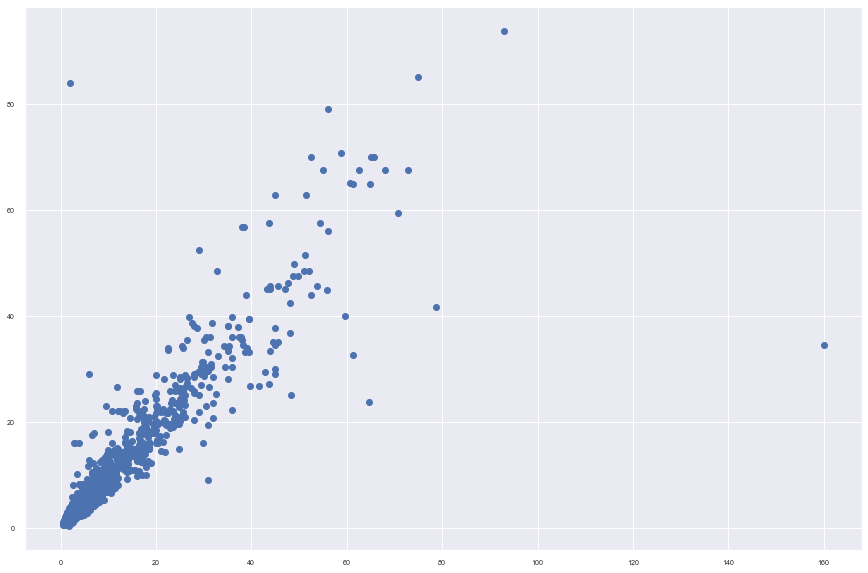

In [92]:
plt.figure(figsize = (15,10))
plt.scatter(y_test,pred)

Evaluation

In [93]:
score_dtree = cross_val_score(dtree, x, y, cv=4)

In [94]:
print('Accuracy Score(%):{}'.format(100*score_dtree.mean()))
print('RMSE:{}'.format(np.sqrt(mean_squared_error(pred, y_test))))

Accuracy Score(%):80.54740199994302
RMSE:4.890779282726047


Choice of model

After evaluating the 3 models, we see that Random Forest Regression has the least RMSE and the highest Cross Validation Score. Therefore Random Forest Regression is the best model for the data.

We will now predict the values of price for the test data given using the same model

Predicting The Prices

Importing the data set

In [95]:
test_df = pd.read_excel(r"C:\Users\KIIT\Desktop\verzeo\Data_test.xlsx")
test_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


In [96]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   object 
 1   Location           1234 non-null   object 
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   int64  
 4   Fuel_Type          1234 non-null   object 
 5   Transmission       1234 non-null   object 
 6   Owner_Type         1234 non-null   object 
 7   Mileage            1234 non-null   object 
 8   Engine             1224 non-null   object 
 9   Power              1224 non-null   object 
 10  Seats              1223 non-null   float64
dtypes: float64(1), int64(2), object(8)
memory usage: 106.2+ KB


We will first change the types of a few columns and wrangle the data to the same form as our final training data.

Removing Units

Engine

In [97]:
new_list_engine = []
for engine in test_df['Engine']:
    string=str(engine)
    rep=string.replace('CC','')
    new_list_engine.append(rep)
    
new_list_engine
    
test_df.insert(8, 'Engine (CC)', new_list_engine)
test_df.drop(['Engine'], axis=1, inplace=True)
    
    
test_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine (CC),Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197,82.85 bhp,5.0


Power

In [98]:
new_list_power = []
for power in test_df['Power']:
    string=str(power)
    rep=string.replace('bhp','')
    new_list_power.append(rep)
    
new_list_power
    
test_df.insert(9, 'Power (bhp)', new_list_power)
test_df.drop('Power', axis=1, inplace=True)
    
    
test_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine (CC),Power (bhp),Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998,58.2,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796,47.3,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393,147.8,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364,null,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197,82.85,5.0


Mileage

In [99]:
new_list_mileage = []

for mileage in test_df['Mileage']:
    string=str(mileage)
    
    if 'kmpl'in string:
        rep=string.replace('kmpl','')
        new_list_mileage.append(rep)
    
    else:
        rep=string.replace('km/kg','')
        new_list_mileage.append(rep)
                        

        
        
new_list_mileage
    
test_df.insert(7, 'Mileage/unit', new_list_mileage)
test_df.drop('Mileage', axis=1, inplace=True)
    
    
test_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage/unit,Engine (CC),Power (bhp),Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998,58.2,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7,796,47.3,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393,147.8,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364,null,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5,1197,82.85,5.0


Changing Type

In [100]:
test_df[["Mileage/unit"]] = test_df[["Mileage/unit"]].astype("float")
test_df[["Engine (CC)"]] = test_df[["Engine (CC)"]].astype("float")
test_df["Power (bhp)"] = pd.to_numeric(test_df["Power (bhp)"], errors='coerce')
test_df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage/unit         float64
Engine (CC)          float64
Power (bhp)          float64
Seats                float64
dtype: object

Dealing with Missing values

In [101]:
test_df.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage/unit          0
Engine (CC)          10
Power (bhp)          32
Seats                11
dtype: int64

As this test data, we cannot replace missing values. Hence dropping the missing values.

In [102]:
test_df.dropna(inplace=True)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1233
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1201 non-null   object 
 1   Location           1201 non-null   object 
 2   Year               1201 non-null   int64  
 3   Kilometers_Driven  1201 non-null   int64  
 4   Fuel_Type          1201 non-null   object 
 5   Transmission       1201 non-null   object 
 6   Owner_Type         1201 non-null   object 
 7   Mileage/unit       1201 non-null   float64
 8   Engine (CC)        1201 non-null   float64
 9   Power (bhp)        1201 non-null   float64
 10  Seats              1201 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 112.6+ KB


Removing Outliers

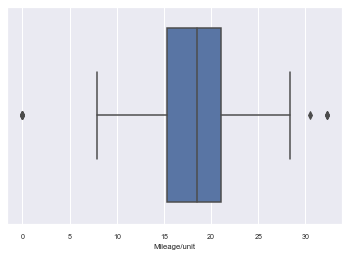

In [103]:
sns.boxplot(x='Mileage/unit',data=test_df)

In [104]:
test_df= test_df[test_df['Mileage/unit']>=5]

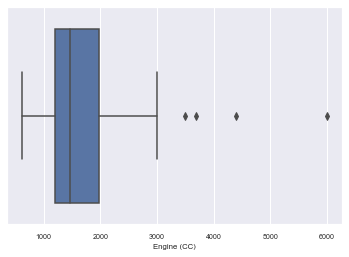

In [105]:
sns.boxplot(x='Engine (CC)',data=test_df)

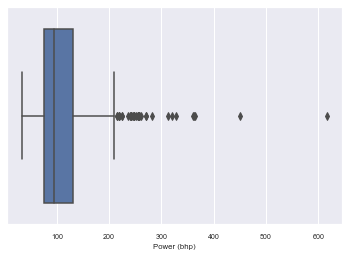

In [106]:
sns.boxplot(x='Power (bhp)',data=test_df)

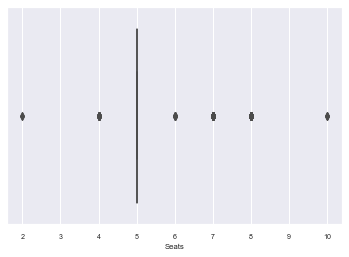

In [107]:
sns.boxplot(x='Seats',data=test_df)

In [108]:
test_df[test_df['Seats']>9]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage/unit,Engine (CC),Power (bhp),Seats
223,Tata Sumo EX 10/7 Str BSII,Chennai,2015,196000,Diesel,Manual,Second,12.2,1948.0,68.0,10.0
269,Chevrolet Tavera LS B3 10 Seats BSIII,Hyderabad,2005,150000,Diesel,Manual,Second,14.8,2499.0,80.0,10.0
856,Toyota Qualis FS B3,Pune,2002,119613,Diesel,Manual,Second,13.1,2446.0,75.0,10.0


These values are correct and not outliers

Creating the same columns as selected in feature selection

In [109]:
make = []
for name in test_df['Name']:
    make.append(name.split(' ')[0])

test_df.insert(1, 'Make', make)

In [110]:
test_df.head()

,Name,Make,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage/unit,Engine (CC),Power (bhp),Seats
0,Maruti Alto K10 LXI CNG,Maruti,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20,4.0
1,Maruti Alto 800 2016-2019 LXI,Maruti,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Toyota,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0
4,Hyundai i20 Magna,Hyundai,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0
5,Mahindra XUV500 W8 2WD,Mahindra,Coimbatore,2016,85609,Diesel,Manual,Second,16.00,2179.0,140.00,7.0


In [111]:
test_df['Make'].unique()

array(['Maruti', 'Toyota', 'Hyundai', 'Mahindra', 'Honda', 'Audi',
       'Nissan', 'BMW', 'Ford', 'Skoda', 'Volkswagen', 'Mitsubishi',
       'Mercedes-Benz', 'Tata', 'Chevrolet', 'Datsun', 'Jaguar', 'Fiat',
       'Renault', 'Mini', 'Bentley', 'Land', 'Volvo', 'Isuzu', 'Jeep',
       'Porsche', 'ISUZU', 'OpelCorsa'], dtype=object)

In [112]:
test_df['Make'].replace('Land','Land Rover',inplace=True)
test_df['Make'].replace('Isuzu', 'ISUZU',inplace=True)

In [113]:
test_df['Make'].nunique()

27

Now since the makers in this dataset are different, we will see which car makers are common and which are exclusive to te new dataset.

In [114]:
exclusive = []
common = []

for make in test_df['Make'].unique():
    
    if make in df['Make'].unique():
        common.append(make)
    
    else:
        exclusive.append(make)
        

print('The common makes are: ',common,'\n')
print('The exclusive makes are: ',exclusive)

The common makes are:  ['Maruti', 'Toyota', 'Hyundai', 'Mahindra', 'Honda', 'Audi', 'Nissan', 'BMW', 'Ford', 'Skoda', 'Volkswagen', 'Mitsubishi', 'Mercedes-Benz', 'Tata', 'Chevrolet', 'Datsun', 'Jaguar', 'Fiat', 'Renault', 'Mini', 'Bentley', 'Land Rover', 'Volvo', 'ISUZU', 'Jeep', 'Porsche'] 

The exclusive makes are:  ['OpelCorsa']


We see that 'OpelCorsa' is a maker which is not there in the training dataset. Therefore, we must classify 'OpelCorsa' in a make category, as 'Make_Category' is a variable used in our model.

For this we will use our domain knowledge about cars as well as perform analysis with other variables to see which category it lies in.

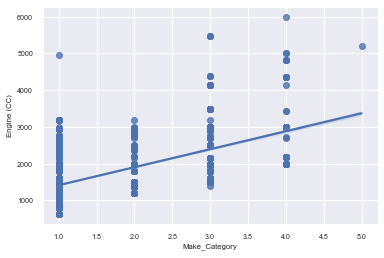

In [115]:
sns.regplot(x='Make_Category', y='Engine (CC)', data=df)

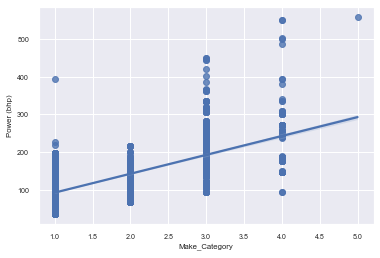

In [116]:
sns.regplot(x='Make_Category', y='Power (bhp)', data=df)

From these plots we can see that there is a positive and strong correlation between the make category and the Engine Size and the Power. Therefore, to find out the make_category of 'OpelCorsa' we should compare its Engine size and Power to the other categories

In [117]:
test_df[test_df['Make']=='OpelCorsa']

,Name,Make,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage/unit,Engine (CC),Power (bhp),Seats
1048,OpelCorsa 1.4Gsi,OpelCorsa,Hyderabad,2005,50000,Petrol,Manual,Second,14.2,1389.0,88.0,5.0


There is only one car with the make 'OpelCorsa'. We will compare its engine size and power to other makes and see which category it is closest to.

In [118]:
df_make_comp = df[['Make_Category', 'Engine (CC)', 'Power (bhp)']]
df_make_comp = df_make_comp.groupby('Make_Category').mean()
df_make_comp

,Engine (CC),Power (bhp)
Make_Category,,
1,1393.532582,92.335478
2,2305.436059,132.693166
3,2302.505995,196.109077
4,2741.818182,233.839000
5,5204.000000,560.000000


Now through bar plots we will compare the average values of Engine size and Power of different Make categories to the Engine size and Power of OpelCorsa

Text(0.5, 0, 'Make_Category')

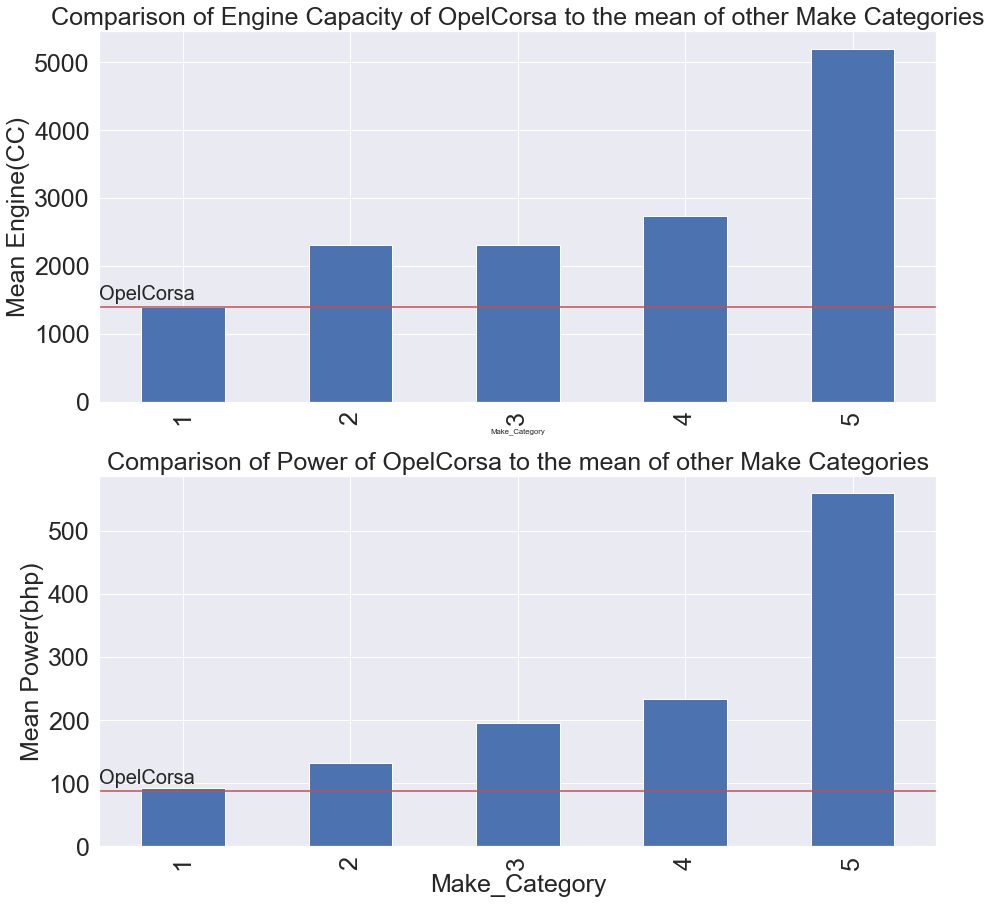

In [119]:
fig_test = plt.figure(figsize=(15,15))
axa = fig_test.add_subplot(211)
axb = fig_test.add_subplot(212)
df_make_comp['Engine (CC)'].plot(kind='bar', fontsize=25, ax=axa)
df_make_comp['Power (bhp)'].plot(kind='bar', fontsize=25, ax=axb)
axa.axhline(y=1389, color='r')
axb.axhline(y=88, color='r')
axa.set_title('Comparison of Engine Capacity of OpelCorsa to the mean of other Make Categories', fontsize=25)
axb.set_title('Comparison of Power of OpelCorsa to the mean of other Make Categories', fontsize=25)
axa.annotate('OpelCorsa', xy=(-0.5,1500), xycoords='data', fontsize=20)
axb.annotate('OpelCorsa', xy=(-0.5,100), xycoords='data', fontsize=20)
axa.set_ylabel('Mean Engine(CC)', fontsize=25)
axb.set_ylabel('Mean Power(bhp)', fontsize=25)
axb.set_xlabel('Make_Category', fontsize=25)

We can clearly see that the values of engine size and power are close to the mean of the class 1 make, therefore it lies in the category 1 which corresponds to Economy. Also after researching the prices of OpelCorsa cars, we can confirm that it lies in th Economy class.

In [120]:
make_category_test = []

for make in test_df['Make']:
    
    if make in ['Ambassador', 'Chevrolet', 'Datsun', 'Fiat', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti', 'Nissan', 'Renault', 'Skoda', 'Tata', 'Volkswagen', 'OpelCorsa']:
        make_category_test.append('Economy')
    
    elif make in ['Force', 'ISUZU', 'Jeep', 'Mitsubishi', 'Toyota', 'Volvo']:
        make_category_test.append('Mid Segment')
        
    elif make in ['Audi', 'BMW', 'Mercedes-Benz', 'Mini']:
        make_category_test.append('Upper Segment')
        
    elif make in ['Bentley', 'Jaguar', 'Land Rover', 'Porsche']:
        make_category_test.append('Luxury')
        
    elif make=='Lamborghini':
        make_category_test.append('Super Car')

        
test_df.insert(2, 'Make_Category', make_category_test)

In [121]:
test_df.head()

,Name,Make,Make_Category,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage/unit,Engine (CC),Power (bhp),Seats
0,Maruti Alto K10 LXI CNG,Maruti,Economy,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20,4.0
1,Maruti Alto 800 2016-2019 LXI,Maruti,Economy,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Toyota,Mid Segment,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0
4,Hyundai i20 Magna,Hyundai,Economy,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0
5,Mahindra XUV500 W8 2WD,Mahindra,Economy,Coimbatore,2016,85609,Diesel,Manual,Second,16.00,2179.0,140.00,7.0


In [122]:
test_df['Make_Category'].replace(to_replace=['Economy', 'Mid Segment', 'Upper Segment', 'Luxury', 'Super Car'], value=[1, 2, 3, 4, 5], inplace=True)
test_df[["Make_Category"]] = test_df[["Make_Category"]].astype('int')
test_df.head()

,Name,Make,Make_Category,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage/unit,Engine (CC),Power (bhp),Seats
0,Maruti Alto K10 LXI CNG,Maruti,1,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20,4.0
1,Maruti Alto 800 2016-2019 LXI,Maruti,1,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Toyota,2,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0
4,Hyundai i20 Magna,Hyundai,1,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0
5,Mahindra XUV500 W8 2WD,Mahindra,1,Coimbatore,2016,85609,Diesel,Manual,Second,16.00,2179.0,140.00,7.0


Now our test data is ready to make the prediction.

Predicting

Fitting the model on the given testing data set

In [123]:
X = test_df[['Make_Category', 'Year', 'Mileage/unit', 'Engine (CC)', 'Power (bhp)']]

In [124]:
predicted_price = rfr.predict(X)

In [125]:
test_df['Predicted Price'] = predicted_price

In [126]:
test_df['Predicted Price'] = test_df['Predicted Price'].round(2)

In [127]:
test_df.drop(['Make', 'Make_Category'], axis=1, inplace=True)

Final Dataset with predicted Prices

In [128]:
test_df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage/unit,Engine (CC),Power (bhp),Seats,Predicted Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20,4.0,3.39
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0,2.10
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0,17.98
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0,4.83
5,Mahindra XUV500 W8 2WD,Coimbatore,2016,85609,Diesel,Manual,Second,16.00,2179.0,140.00,7.0,13.47
...,...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,4.16
1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,6.49
1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.03
1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,4.39
